## Add Fit

### Author: Henry Nachman

This Jupyter notebook will show how to add a fit or a Dataset to the repository and subsequently update the repo. This is done using the example of Kevlar

In [1]:
from material_class import Material, Fit, DataSet
import matplotlib.pyplot as plt
import numpy as np
import pickle, os

from scipy.special import erf

from fit_types import Nppoly, polylog, loglog_func, linear_fit, get_func_type
from tc_utils import *

If the material is not yet a part of the repository

In [23]:
# Make the material instance
new_material_name = "Kevlar29" # This should match the folder name in lib/
kevlar29 = Material(new_material_name, fit_type="powerlaw", force_update=True)

# Save the material instance to a pickle file
pickle_file = os.path.join("lib", new_material_name, f"material.pkl")
with open(pickle_file, "wb") as f:
    pickle.dump(kevlar29, f)

new_material_name = "Kevlar" # This should match the folder name in lib/
kevlar = Material(new_material_name, fit_type="powerlaw", force_update=True)

# Save the material instance to a pickle file
pickle_file = os.path.join("lib", new_material_name, f"material.pkl")
with open(pickle_file, "wb") as f:
    pickle.dump(kevlar, f)

In [32]:
kevlar49_name = "Kevlar49_Composite_Aramid"
material_folder = os.path.join("lib", kevlar49_name)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {kevlar49_name} from pickle")
# Load the material of interest from the saved pickle file
kevlar49_mat = pickle.load(open(pickle_file, "rb"))

kevlar49_fiber_name = "Kevlar49_Fiber_Aramid"
material_folder = os.path.join("lib", kevlar49_fiber_name)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {kevlar49_fiber_name} from pickle")
# Load the material of interest from the saved pickle file
kevlar49_fiber_mat = pickle.load(open(pickle_file, "rb"))


kevlar29_name = "Kevlar29"
material_folder = os.path.join("lib", kevlar29_name)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {kevlar29_name} from pickle")
# Load the material of interest from the saved pickle file
kevlar29_mat = pickle.load(open(pickle_file, "rb"))


kevlar_name = "Kevlar"
material_folder = os.path.join("lib", kevlar_name)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {kevlar_name} from pickle")
# Load the material of interest from the saved pickle file
kevlar_mat = pickle.load(open(pickle_file, "rb"))

Loading Kevlar49_Composite_Aramid from pickle
Loading Kevlar49_Fiber_Aramid from pickle
Loading Kevlar29 from pickle
Loading Kevlar from pickle


In [9]:
print(help(Fit))

Help on class Fit in module material_class:

class Fit(builtins.object)
 |  Fit(
 |      material: str,
 |      source: str,
 |      range: tuple,
 |      parameters: numpy.ndarray,
 |      parameter_covariance: numpy.ndarray,
 |      fit_type=None,
 |      fit_error: float = None
 |  )
 |
 |  A class to represent a fit applied to the data.
 |
 |  Attributes:
 |      material (str): Name of the material.
 |      source (str): Source of the fit (e.g., "data", "literature").
 |      name (str): Name of the fit (usually material + source).
 |      range (tuple): Temperature range over which the fit is valid.
 |      parameters (np.ndarray): Parameters of the fit function.
 |      parameter_covariance (np.ndarray): Covariance matrix of the fit parameters.
 |      fit_type (str): Type of fit function used.
 |      fit_error (float): Optional error metric for the fit.
 |      reference (str): Reference for the fit.
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      material:

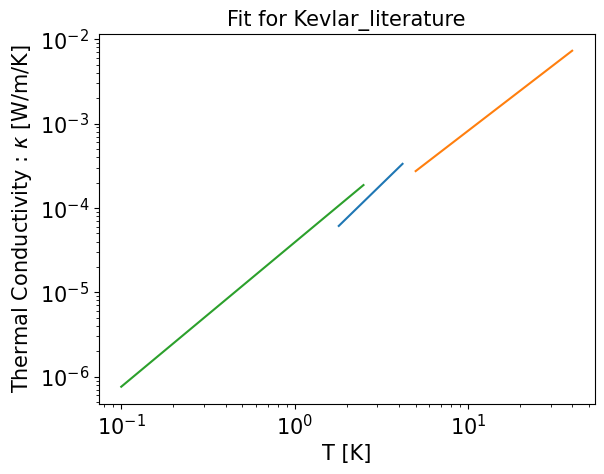

In [27]:
#Define the new fit instance
zhang_fit = Fit(
    material = kevlar49_name,
    source   = "literature",
    range    = (1.8, 4.2),
    parameters = [18.9e-6, 2],
    parameter_covariance = [0, 0],
    fit_type = "powerlaw",
)

zhang_fit.add_reference("Kevlar thermal conductivity (personal communication), J.H. Zhang, 1990")
# Append fit to material fits
kevlar49_mat.fits.append(zhang_fit)
zhang_fit.plot()

duband_fit = Fit(
    material = kevlar29_name,
    source   = "literature",
    range    = (5, 40),
    parameters = [21.5e-6, 1.58],
    parameter_covariance = [0, 0],
    fit_type = "powerlaw",
)

duband_fit.add_reference("Thermal isolation of large loads at low temperature using Kevlar rope, Duband et al., Cryogenics 33 1993")
kevlar29_mat.fits.append(duband_fit)
duband_fit.plot()

ventura_fit = Fit(
    material = kevlar_name,
    source   = "literature",
    range    = (0.1, 2.5),
    parameters = [3.9e-5, 1.71],
    parameter_covariance = [0.2e-5, 0.04],
    fit_type = "powerlaw",
)

ventura_fit.add_reference("Low temperature thermal conductivity of Kevlar, Ventura et al., Cryogenics 40 2000")
kevlar_mat.fits.append(ventura_fit)
ventura_fit.plot()

In this case we also added a parent folder, so make sure to match the children to the parent.

In [33]:
kevlar49_mat.parent = "Kevlar"
kevlar29_mat.parent = "Kevlar"
kevlar49_fiber_mat.parent = "Kevlar"

Now we need to save these changes to the various pickle files.

In [34]:
names = [kevlar49_name, kevlar49_fiber_name, kevlar29_name, kevlar_name]
materials = [kevlar49_mat, kevlar49_fiber_mat, kevlar29_mat, kevlar_mat]
for new_material_name, material in zip(names, materials):
    # Save the material instance to a pickle file
    pickle_file = os.path.join("lib", new_material_name, f"material.pkl")
    with open(pickle_file, "wb") as f:
        pickle.dump(material, f)

In [31]:
# Let's check that we saved correctly
for new_material_name in names:
    pickle_file = os.path.join("lib", new_material_name, f"material.pkl")
    if os.path.exists(pickle_file):
        print(f"Loading {new_material_name} from pickle")
    # Load the material of interest from the saved pickle file
    mat = pickle.load(open(pickle_file, "rb"))
    print(f"{new_material_name} has {len(mat.fits)} fits.")

Loading Kevlar49_Composite_Aramid from pickle
Kevlar49_Composite_Aramid has 2 fits.
Loading Kevlar29 from pickle
Kevlar29 has 1 fits.
Loading Kevlar from pickle
Kevlar has 1 fits.


Now that we have added the fits, the easiest way to propagate the changes is to run the update_repo.py file

Let's inspect the Kevlar parent now

In [35]:
# Reload the kevlar material

kevlar_name = "Kevlar"
material_folder = os.path.join("lib", kevlar_name)
pickle_file = os.path.join(material_folder, "material.pkl")
if os.path.exists(pickle_file):
    print(f"Loading {kevlar_name} from pickle")
# Load the material of interest from the saved pickle file
kevlar_mat = pickle.load(open(pickle_file, "rb"))

Loading Kevlar from pickle


{'material': 'Kevlar29', 'source': 'literature', 'name': 'Kevlar29_literature', 'range': (5, 40), 'parameters': [2.15e-05, 1.58], 'parameter_covariance': [0, 0], 'fit_type': 'powerlaw', 'fit_error': None}


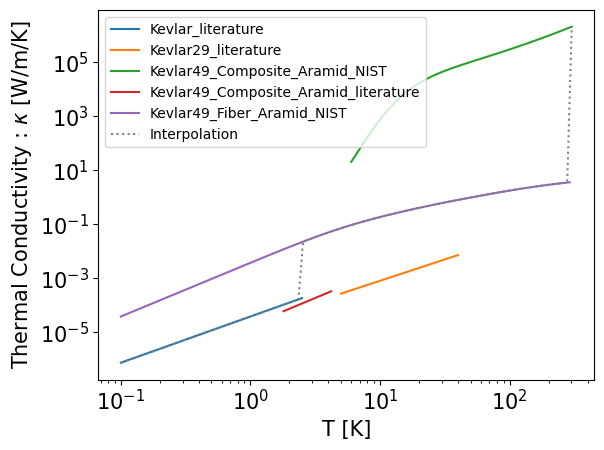

In [42]:
# Plot the Kevlar material with all fits
kevlar_mat.plot_all_fits()
print(kevlar_mat.fits[1].__dict__)

As we can see, there are some discrepancies between the different fits. A future update will plan to add some customization of which fits are used in the interpolation.